In [101]:
import requests
import lxml
import bs4
import re

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [103]:
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected = True) #this connect the javascript to the notebook
cf.go_offline() #this allows us to use cufflinks offline

In [104]:
price = []
yr = []
km = []
money_pattern = r'\d{1,3},\d{3}'
year_pattern  = r'\d{4,}'
km_pattern =    r'\d{1,3},\d{3}'

for page in range(1,4):
    url = f'https://www.kijiji.ca/b-cars-trucks/calgary/audi-a4-new__used/page-{page}/c174l1700199a54a1000054a49'
    result = requests.get(url)
    result_soup = bs4.BeautifulSoup(result.text, 'lxml')
    price_class = result_soup.select('.price')
    title_class = result_soup.select('.title')   #we will extract 'year' information from title
    detail_class =result_soup.select('.details')  #we will extract 'milage' info from the detail.
    page_listing = len(price_class)
    
    for i in range(5,page_listing):
        
        ### Populate price list
        price_class_ith = str(price_class[i])
        price_ith = re.search(money_pattern, price_class_ith) #If price_class_ith is 'please contact', then price_ith will return None
        try:
            price_ith_int = int(''.join([n for n in price_ith.group() if n != ',']))
            price.append(price_ith_int)
        except AttributeError as reason: #if price_ith is a None, then price_ith.group() will raise an Attribute Error
            price.append(np.nan)
            
            
            
        ### Populate yr list
        title_class_ith = str(title_class[i*2])
        year_ith = int((re.search(year_pattern, title_class_ith)).group())
        if year_ith > 2030:
            yr.append(np.nan)
        else:   
            yr.append(year_ith)
        
        
        ### Populate km list
        km_class_ith = str(detail_class[i])
        km_ith = re.search(km_pattern,km_class_ith)
        try:
            km_ith_int = int(''.join([n for n in km_ith.group() if n != ',']))
            km.append(km_ith_int)
        except AttributeError as reason: 
            km.append(np.nan)
            
        
        
        
        

In [105]:
print(len(price))
print(len(km))
print(len(yr))

115
115
115


In [106]:
df = pd.DataFrame({'year':yr, 'km':km, 'price':price})

In [107]:
df

,year,km,price
0,2017.0,87000.0,25000.0
1,2004.0,220000.0,3800.0
2,2007.0,132000.0,6900.0
3,2013.0,36000.0,19750.0
4,2011.0,103888.0,13999.0
...,...,...,...
110,2002.0,203116.0,5000.0
111,NaN,187000.0,5500.0
112,NaN,57500.0,28488.0
113,NaN,165000.0,5600.0


In [108]:
df.corr()

,year,km,price
year,1.000000,-0.822399,0.909256
km,-0.822399,1.000000,-0.848239
price,0.909256,-0.848239,1.000000


In [109]:
df['price'].iplot(kind = 'hist', bins = 40)

<AxesSubplot:>

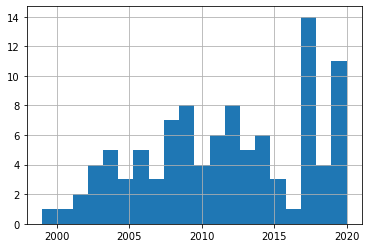

In [110]:
df['year'].hist(bins=20)

<AxesSubplot:>

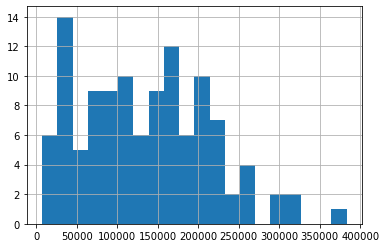

In [111]:
df['km'].hist(bins = 20)

In [112]:
import plotly.express as px

In [113]:
fig = px.scatter(
    df, x='km', y='price', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

(0.0, 50337.61557798185)

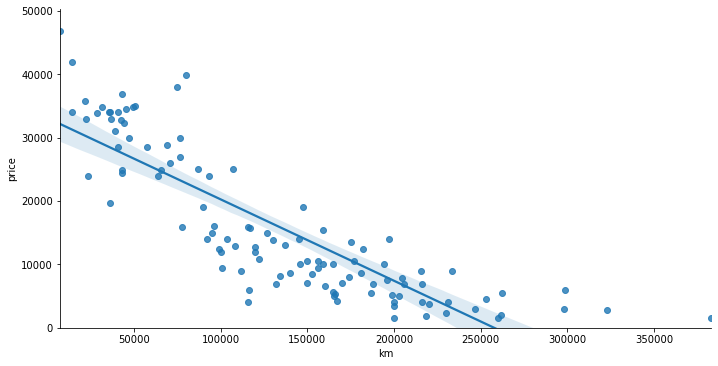

In [114]:
g= sns.lmplot(data = df, x='km', y ='price',height=5,aspect=2 )
plt.ylim(bottom=0)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



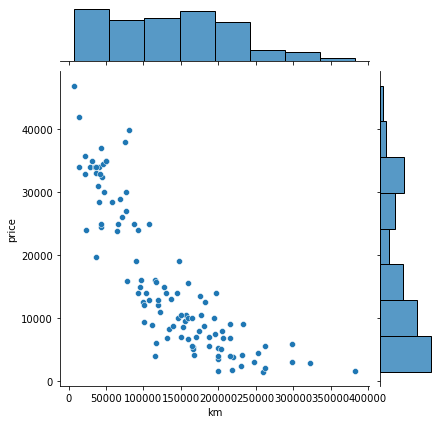

In [115]:
sns.jointplot(df['km'],df['price'])

In [116]:
fig = px.scatter(
    df, x='year', y='price', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

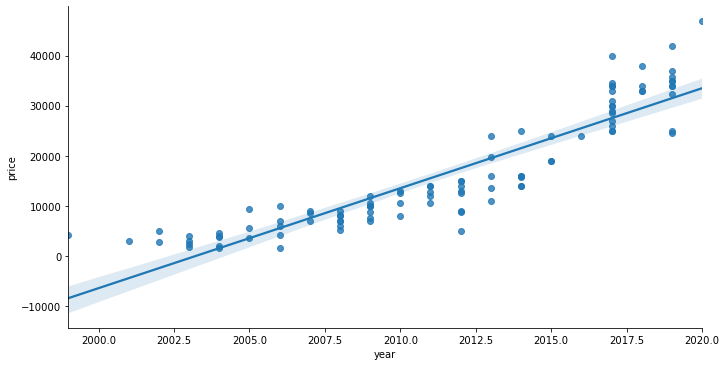

In [117]:
sns.lmplot(data=df, x = 'year', y = 'price', height=5, aspect=2)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



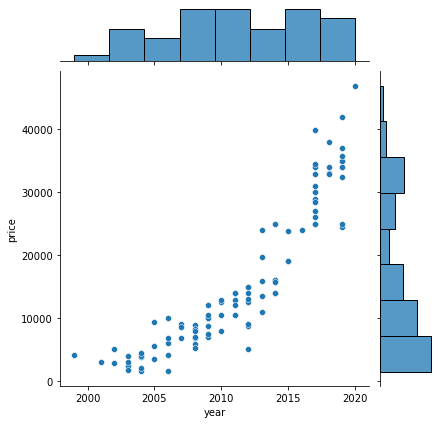

In [118]:
sns.jointplot(df['year'], df['price'])

In [119]:
df = pd.DataFrame({'year':yr,'price':price, 'km':km })

In [120]:
df_yr_sort = df.sort_values('year')

In [121]:
df_yr_sort = df_yr_sort.reset_index()

In [122]:
df_yr_sort['km_lim'] = 120000
df_yr_sort['afford'] = 12000

In [123]:
import time
time.ctime()

'Mon Jan 18 16:07:39 2021'

In [124]:
df_yr_sort.iplot(secondary_y=['price','afford'])

In [125]:
#65 2013 122000km $11400 rebuilt